In [1]:
 !pip install --upgrade tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras # Import keras from tensorflow

# Rest of the code
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [3]:
import pandas as pd
import numpy as np
data_sarcastic = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Sarcasm_Hindi_Tweets-SARCASTIC.csv")
data_non_sarcastic = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Sarcasm_Hindi_Tweets-NON-SARCASTIC.csv")
data_sarcastic['label'] = 'sarcastic'
data_non_sarcastic['label'] = 'non_sarcastic'
df = pd.concat([data_sarcastic, data_non_sarcastic], axis=0)
df = df.drop(['username','acctdesc','location','following','followers', 'totaltweets', 'usercreatedts', 'tweetcreatedts', 'retweetcount', 'hashtags'] ,axis=1)
df = df.reset_index()
df = df.drop('index',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16179 entries, 0 to 16178
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16179 non-null  object
 1   label   16179 non-null  object
dtypes: object(2)
memory usage: 252.9+ KB


In [4]:
df.head()

,text,label
0,"हमारे गांव में एक मास्टर जी रहते थे, वो मोहल्ल...",sarcastic
1,"हमारे गांव में एक मास्टर जी रहते थे, वो मोहल्ल...",sarcastic
2,"हमारे गांव में एक मास्टर जी रहते थे, वो मोहल्ल...",sarcastic
3,"हमारे गांव में एक मास्टर जी रहते थे, वो मोहल्ल...",sarcastic
4,"हमारे गांव में एक मास्टर जी रहते थे, वो मोहल्ल...",sarcastic


In [5]:
import string
from tqdm import tqdm
from tqdm.notebook import tqdm

import nltk
from nltk.tokenize import word_tokenize

In [6]:
def count_length():
    df['word_count'] = df['text'].apply(lambda x: len(str(x).split(" ")))

count_length()

In [7]:
df.head()

,text,label,word_count
0,"हमारे गांव में एक मास्टर जी रहते थे, वो मोहल्ल...",sarcastic,58
1,"हमारे गांव में एक मास्टर जी रहते थे, वो मोहल्ल...",sarcastic,58
2,"हमारे गांव में एक मास्टर जी रहते थे, वो मोहल्ल...",sarcastic,58
3,"हमारे गांव में एक मास्टर जी रहते थे, वो मोहल्ल...",sarcastic,58
4,"हमारे गांव में एक मास्टर जी रहते थे, वो मोहल्ल...",sarcastic,58


In [8]:
df.tail()

,text,label,word_count
16174,स्वर्गीय श्री सुशांत सिंह राजपूत ने हमें छिछोर...,non_sarcastic,36
16175,बॉलीवुड एक्टर #सुशांत_सिंह_राजपूत ने #फांसी लग...,non_sarcastic,45
16176,#SushantSinghRajput #Suicide क्यों?? चमक धमक ...,non_sarcastic,40
16177,हर हाल में #खुश रहना सीख लो🙃\n उस दिल क...,non_sarcastic,47
16178,इतना कुछ पाने के बाद भी अगर इंसान जिदंगी से हा...,non_sarcastic,48


In [9]:
import re
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

In [10]:
for i in tqdm(range(len(df))):
    df['text'][i] = emoji_pattern.sub(r'', df['text'][i])
count_length()

  0%|          | 0/16179 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['text'][i] = emoji_pattern.sub(r'', df['text'][i])
<ipython-input-10-bcf672b4bc02>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'][i] = emoji_pattern.sub(r'', df['text'][i])
<ipython-input-10-bcf672b4bc02>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0)

In [11]:
df.tail()

,text,label,word_count
16174,स्वर्गीय श्री सुशांत सिंह राजपूत ने हमें छिछोर...,non_sarcastic,36
16175,बॉलीवुड एक्टर #सुशांत_सिंह_राजपूत ने #फांसी लग...,non_sarcastic,45
16176,#SushantSinghRajput #Suicide क्यों?? चमक धमक ...,non_sarcastic,40
16177,हर हाल में #खुश रहना सीख लो\n उस दिल को...,non_sarcastic,47
16178,इतना कुछ पाने के बाद भी अगर इंसान जिदंगी से हा...,non_sarcastic,48


In [12]:
# Using ChatGPT creating stop words and using that

stopwords_hindi = ['आपका','अंदर', 'अत', 'अपना', 'अपनी', 'अपने', 'अभी', 'आदि', 'आप',
                   'इत्यादि', 'इन', 'इनका', 'इन्हीं', 'इन्हें', 'इन्हों', 'इस', 'इसका', 'इसकी',
                   'इसके', 'इसमें', 'इसी', 'इसे', 'उन', 'उनका', 'उनकी', 'उनके', 'उनको',
                   'उन्हीं', 'उन्हें', 'उन्हों', 'उस', 'उसके', 'उसी', 'उसे', 'एक', 'एवं', 'एस',
                   'ऐसे', 'और', 'कई', 'कर','करता', 'करते', 'करना', 'करने', 'करें', 'कहते', 'कहा',
                   'का', 'काफ़ी', 'कि', 'कितना', 'किन्हें', 'किन्हों', 'किया', 'किर', 'किस', 'किसी', 'किसे',
                   'की', 'कुछ', 'कुल', 'के', 'को', 'कोई', 'कौन', 'कौनसा', 'गया', 'घर', 'जब', 'जहाँ',
                   'जा', 'जितना', 'जिन', 'जिन्हें', 'जिन्हों', 'जिस', 'जिसे', 'जीधर', 'जैसा', 'जैसे', 'जो',
                   'तक', 'तब', 'तरह', 'तिन', 'तिन्हें', 'तिन्हों', 'तिस', 'तिसे', 'तो', 'था', 'थी', 'थे',
                   'दबारा', 'दिया', 'दुसरा', 'दूसरे', 'दो', 'द्वारा', 'न', 'नहीं', 'ना', 'निहायत', 'नीचे', 'ने',
                   'पर', 'पर', 'पहले', 'पूरा', 'पे', 'फिर', 'बनी', 'बही', 'बहुत', 'बाद', 'बाला', 'बिलकुल',
                   'भी', 'भीतर', 'मगर', 'मानो', 'मे', 'में', 'यदि', 'यह', 'यहाँ', 'यही', 'या'
                  'तुम','मेरी','मुझे','क्योंकि','हम','प्रति','अबकी','आगे','माननीय','शहर','बताएं','कौनसी'
                   'क्लिक','किसकी','बड़े','मैं','and','रही','आज','लें','आपके','मिलकर','सब','मेरे','जी'
                   'श्री', 'यिह', 'ये', 'रखें', 'रहा', 'रहे', 'ऱ्वासा', 'लिए', 'लिये', 'लेकिन', 'व', 'वर्ग', 'वह',
                   'वहाँ', 'वहीं', 'वाले', 'वुह', 'वे', 'वग़ैरह', 'संग', 'सकता', 'सकते', 'सबसे', 'सभी', 'साथ',
                   'साबुत', 'साभ', 'सारा', 'से', 'सो', 'ही', 'हुआ', 'हुई', 'हुए', 'है', 'हैं', 'हो', 'होता', 'होती',
                   'होते', 'होना', 'होने', 'अपनि', 'जेसे', 'होति', 'सभि', 'तिंहों', 'इंहों', 'दवारा', 'इसि', 'किंहें',
                   'थि', 'उंहों', 'ओर', 'जिंहें', 'वहिं', 'अभि', 'बनि', 'हि', 'उंहिं', 'उंहें', 'हें', 'वगेरह', 'एसे',
                   'रवासा', 'कोन', 'निचे', 'काफि', 'उसि', 'पुरा', 'भितर', 'हे', 'बहि', 'वहां', 'कोइ', 'यहां',
                   'जिंहों', 'तिंहें', 'किसि', 'कइ', 'यहि', 'इंहिं', 'जिधर', 'इंहें', 'अदि', 'इतयादि', 'हुइ', 'कोनसा',
                   'इसकि', 'दुसरे', 'जहां', 'अप', 'किंहों', 'उनकि', 'भि', 'वरग', 'हुअ', 'जेसा', 'नहिं']

stopwords_english = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're",
                "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him',
                'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its',
                'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who',
                'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was',
                'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did',
                'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
                'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
                'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
                'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
                'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
                'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
                'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should',
                "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't",
                'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
                "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
                "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
                "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

stopwords = stopwords_hindi + stopwords_english


In [13]:
import nltk

nltk.download('punkt')
nltk.download('punkt_tab') # Download the punkt_tab models

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [14]:
def processText(text):
    text = text.lower()

    text = re.sub('((www.[^s]+)|(https?://[^s]+))','',text)
    text = re.sub('@[^s]+','',text)
    text = re.sub('[s]+', ' ', text)
    text = re.sub(r'#([^s]+)', '', text)

    tokenized_text = word_tokenize(text)
    print(tokenized_text)

    output_string = ''

    for each in tokenized_text:
        if ( each not in string.punctuation and each not in stopwords and len(each) > 1 ):
            output_string += each + ' '


    return output_string

In [15]:
df['text'][0]
processText(df['text'][0])

['हमारे', 'गांव', 'में', 'एक', 'मास्टर', 'जी', 'रहते', 'थे', ',', 'वो', 'मोहल्ले', 'के', 'बच्चों', 'को', 'अपने', 'स्कूल', 'आने', 'को', 'कहते', 'थे।', 'जब', 'मैं', 'बड़ा', 'हुआ', 'तो', 'पता', 'चला-', 'स्कूल', 'मास्टर', 'के', 'बेटे', 'का', ',', 'बस', 'उनके', 'भतीजे', 'की', ',', 'कैंटीन', 'उनके', 'भांजे', 'की', 'और', 'पढ़ाने', 'वाले', 'भी', 'सब', 'उनके', 'रिश्तेदार', 'ही', 'थे', '..', '!', 'आज', 'मास्टर', 'जी', 'में', 'सरकार', 'में', 'मंत्री', 'हैं', '.', '!']


'हमारे गांव मास्टर जी रहते वो मोहल्ले बच्चों स्कूल आने थे। बड़ा पता चला- स्कूल मास्टर बेटे बस भतीजे कैंटीन भांजे पढ़ाने रिश्तेदार .. मास्टर जी सरकार मंत्री '

In [16]:
tqdm.pandas()
df['text'] = df['text'].progress_apply(processText)
count_length()

  0%|          | 0/16179 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
['jinhe', 'pa', 'and', 'nahi', 'tha', 'bharat', 'unhe', 'plane', 'e', 'waapi', 'laya', 'gaya', 'or', 'jo', 'bharat', 'ke', 'nirmaan', 'me', 'lage', 'the', 'unhe', 'paidal', 'ghar', 'jaana', 'pada']
['मुस्कुराते', 'चेहरे', '..', 'राज़', 'गहरे।।']
['aan_', '_tukai', 'ab', 'vapi', 'ek', 'koi', 'jhoothi', 'kahaani', 'unakar', 'logo', 'ko', 'bewakoof', 'banaya', 'jayega', ',', 'aur', 'ye', 'murder', 'ko', 'uicide', 'ka', 'naam', 'deke', 'ca', 'e', 'band', 'kar', 'diya', 'jayega']
[]
[]
['ingh', '@', 'achinpilot', 'hik', 'hanew', 'माननीय', 'शिक्षा', 'मंत्री', 'जी']
[]
['तेरी']
['purana', 'purana', 'he', 'hota', 'hai']
['दिल', 'की', 'आवाज़', 'में', 'आवाज़', 'मिलाते', 'रहिए', 'जागते', 'रहिए', 'ज़माने', 'को', 'जगाते', 'रहिए', '...', '-', 'हफ़ीज़', 'बनारसी']
['मेरे', 'हिस्से', 'की', 'खुशी']
[]
['babaji', 'kal', 'ki', 'ubeh', 'bahut', 'achi', 'laana', ',', 'aur', 'u', 'ke', 'baad', 'ki', 'bhi', 'har', 'ubeh']
['hum', 'thehre', 'gunahgaar', 'yaaro

In [17]:
import gensim

In [18]:
def tokenize_text(text):
    token_list = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if ( len (word ) < 2 ):
                continue
            token_list.append(word)
    return token_list

train_tagged = df.progress_apply(lambda r:gensim.models.doc2vec.TaggedDocument(tokenize_text(r['text']), [r['label']]), axis=1)

  0%|          | 0/16179 [00:00<?, ?it/s]

In [19]:
def doc_2_vec_model(train_tagged_):
    train_set = []
    for tag in tqdm(train_tagged):
        train_set.append(tag)

    dbow_model = gensim.models.doc2vec.Doc2Vec(vector_size=200, min_count=2, epochs=30)
    dbow_model.build_vocab([x for x in tqdm(train_set)])
    dbow_model.train(train_set, total_examples=len(train_set), epochs=50)
    return train_set, dbow_model

def vector_for_learning(model, input_docs):
    sents = input_docs
    feature_vectors, target = zip(*[(model.infer_vector(doc.words), doc.tags[0]) for doc in tqdm(sents) ])
    return feature_vectors, target

train_ds, dbow_model = doc_2_vec_model(train_tagged)
x, y = vector_for_learning(dbow_model, train_ds)
x = np.array(x)
y = np.array(y)

  0%|          | 0/16179 [00:00<?, ?it/s]

  0%|          | 0/16179 [00:00<?, ?it/s]

  0%|          | 0/16179 [00:00<?, ?it/s]

In [20]:
y = [1 if label == 'sarcastic' else 0 for label in y]
print(y)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix

In [22]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=42)
model = RandomForestClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_valid)

Accuracy Score : 0.969097651421508
RoC Score : 0.9590353126207243


<ipython-input-23-c93ddc227afd>:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


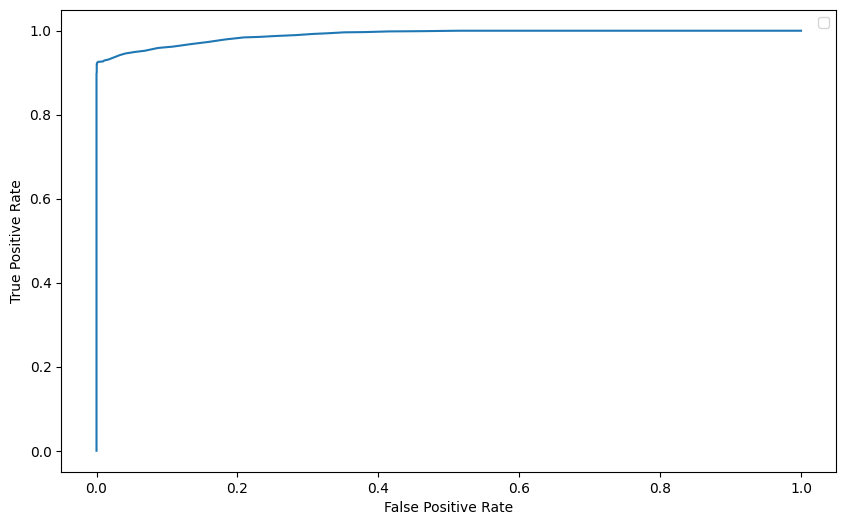

In [23]:
print('Accuracy Score : {}'.format(accuracy_score(y_valid, pred)))

lr_probs = roc_auc_score(y_valid, pred)
print('RoC Score : {}'.format(lr_probs))

lr_probs = model.predict_proba(x_valid)
lr_probs = lr_probs[:, 1]
fpr, tpr, _ = roc_curve(y_valid, lr_probs)

plt.figure(figsize=(10,6))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [25]:
import seaborn as sns

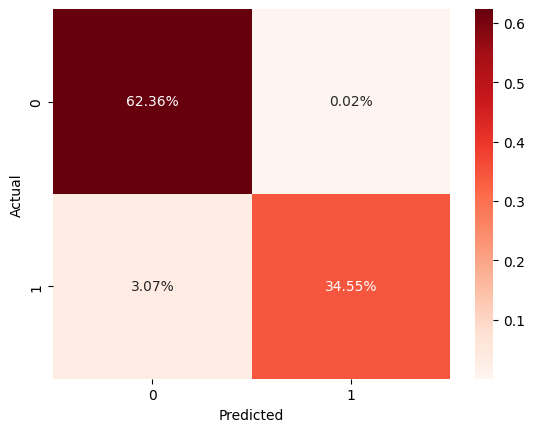

In [26]:
cf_matrix = confusion_matrix(y_valid, pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()